##Wisconsin Breast Cancer Data Clustering.

Author: Abul Hasnat

Dataset (c) Fazle Rabbi



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('https://raw.githubusercontent.com/FazlyRabbiBD/AcademicWorkspace/master/CancerData.csv')
df.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       699 non-null    int64  
 1   Id               699 non-null    int64  
 2   Cl.thickness     699 non-null    int64  
 3   Cell.size        699 non-null    int64  
 4   Cell.shape       699 non-null    int64  
 5   Marg.adhesion    699 non-null    int64  
 6   Epith.c.size     699 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      699 non-null    int64  
 9   Normal.nucleoli  699 non-null    int64  
 10  Mitoses          699 non-null    int64  
 11  Class            699 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


In [ ]:
df["Class"].value_counts()

benign       458
malignant    241
Name: Class, dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
dfp = df.drop('Unnamed: 0', axis=1)

In [ ]:
dfp = dfp.drop('Class', axis=1)

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     699 non-null    int64  
 1   Cell.size        699 non-null    int64  
 2   Cell.shape       699 non-null    int64  
 3   Marg.adhesion    699 non-null    int64  
 4   Epith.c.size     699 non-null    int64  
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      699 non-null    int64  
 7   Normal.nucleoli  699 non-null    int64  
 8   Mitoses          699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [ ]:
scaler = MinMaxScaler()
scaler.fit(dfp)
scaled = pd.DataFrame(scaler.transform(dfp),columns=dfp.columns)
scaled.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [ ]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    float64
 1   Cl.thickness     699 non-null    float64
 2   Cell.size        699 non-null    float64
 3   Cell.shape       699 non-null    float64
 4   Marg.adhesion    699 non-null    float64
 5   Epith.c.size     699 non-null    float64
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    float64
 8   Normal.nucleoli  699 non-null    float64
 9   Mitoses          699 non-null    float64
dtypes: float64(10)
memory usage: 54.7 KB


In [ ]:
null_values = scaled.isnull().sum()
print(null_values)

Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
dtype: int64


In [ ]:
scaled.dropna(inplace = True)

In [ ]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               683 non-null    float64
 1   Cl.thickness     683 non-null    float64
 2   Cell.size        683 non-null    float64
 3   Cell.shape       683 non-null    float64
 4   Marg.adhesion    683 non-null    float64
 5   Epith.c.size     683 non-null    float64
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      683 non-null    float64
 8   Normal.nucleoli  683 non-null    float64
 9   Mitoses          683 non-null    float64
dtypes: float64(10)
memory usage: 58.7 KB


In [ ]:
scaled

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
694,0.053393,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000
695,0.058251,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
696,0.061764,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111
697,0.062410,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

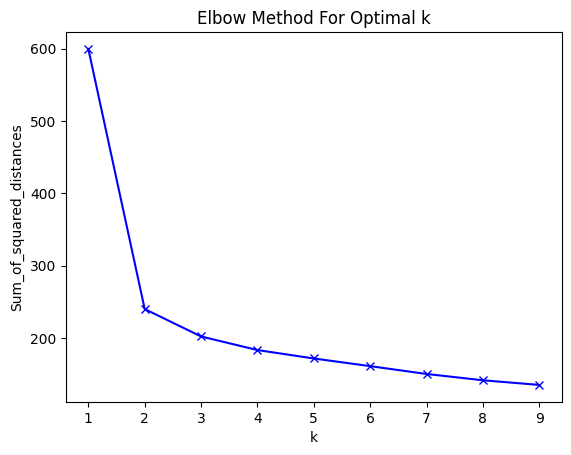

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Optimal k value = 2

In [ ]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [ ]:
df["Cluster"] = labels
df.head(5)

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class,Cluster
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign,0
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign,1
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign,0
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign,1
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign,0


In [ ]:
df.groupby('Cluster').mean()

<ipython-input-23-9780075f7ef4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cluster').mean()


,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
Cluster,,,,,,,,,,,
0,376.346578,1.117482e+06,3.055188,1.298013,1.428256,1.353201,2.094923,1.317881,2.092715,1.260486,1.112583
1,305.104348,9.964378e+05,7.173913,6.800000,6.734783,5.739130,5.478261,7.930435,6.108696,6.039130,2.569565


#### Mean of Cell Size in cluster 0 = 1.29
#### Mean of Cell Size in cluster 1 = 6.8

### Dendogram and Agglomerative Clustering

In [ ]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FazlyRabbiBD/AcademicWorkspace/master/CancerData.csv')
df.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.drop(columns = 'Class', inplace = True)

In [ ]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,9.999750e-07,1.0,0.000005,9.999750e-07,9.999750e-07,9.999750e-07,0.000002,9.999750e-07,0.000003,9.999750e-07,9.999750e-07
1,1.994127e-06,1.0,0.000005,3.988255e-06,3.988255e-06,4.985318e-06,0.000007,9.970636e-06,0.000003,1.994127e-06,9.970636e-07
2,2.954428e-06,1.0,0.000003,9.848093e-07,9.848093e-07,9.848093e-07,0.000002,1.969619e-06,0.000003,9.848093e-07,9.848093e-07
3,3.935935e-06,1.0,0.000006,7.871870e-06,7.871870e-06,9.839837e-07,0.000003,3.935935e-06,0.000003,6.887886e-06,9.839837e-07
4,4.916310e-06,1.0,0.000004,9.832619e-07,9.832619e-07,2.949786e-06,0.000002,9.832619e-07,0.000003,9.832619e-07,9.832619e-07


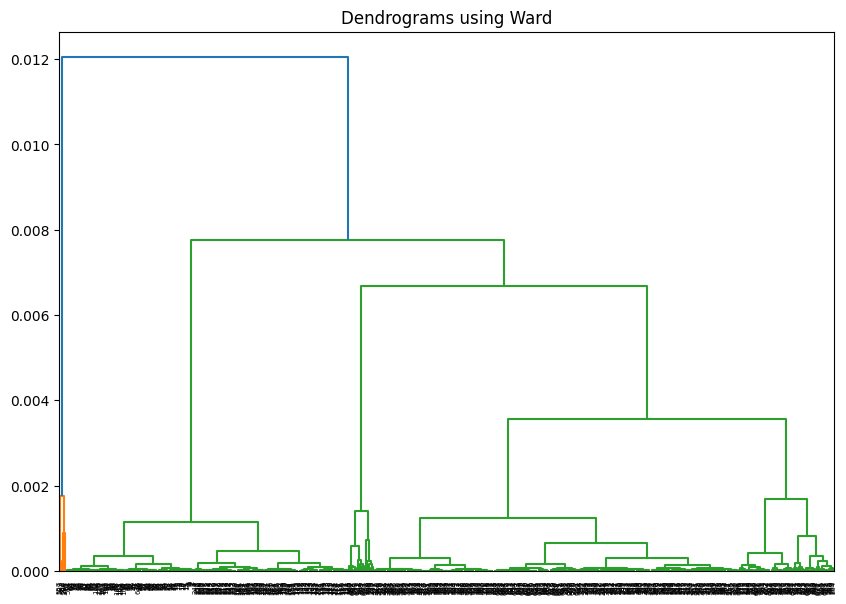

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms using Ward")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Silhouette

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df),columns=df.columns)

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(scaled)
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

max_score_index = silhouette_scores.index(max(silhouette_scores))

optimal_num_clusters = max_score_index + 2

max_silhouette_score = max(silhouette_scores)

print("Optimal number of clusters:", optimal_num_clusters)
print("Max silhouette score:", max_silhouette_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 2
Max silhouette score: 0.5365332260444037
